<a href="https://colab.research.google.com/github/aviplane/paircreation-analysis/blob/main/PairCreationFigures_All_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a notebook for plotting figures for our pair creation data.

# Setup

Set up Google Drive, and point to the appropriate folder

In [1]:
### Google Drive
from google.colab import drive
drive.mount('/gdrive', force_remount= True)
drive_location = '/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/'
import os

Mounted at /gdrive


Install useful libraries

In [2]:
!pip install colorcet

     |████████████████████████████████| 1.6MB 5.8MB/s 


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from colorcet import cm
from datetime import date
correlation_colormap = cm.gwv
import matplotlib.animation as animation

from matplotlib import rcParams
import matplotlib as mpl
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['axes.grid'] = True
###Some notes
### alpha > 0 preferred to dashed lines
magnetization_colormap = cm.coolwarm
phase_colormap = "hsv"
contrast_colormap = cm.fire
correlation_colormap = cm.coolwarm
labelsize = 13

def transparent_edge_plot(ax, x, y, yerr = None , marker = 'o', ms = 12, **kwargs):
    if yerr is not None:
        base,_,_ = ax.errorbar(x, y, yerr, ms = ms, marker = marker, linestyle ="None", alpha =0.6, markeredgewidth = 2, **kwargs)
    else:
        base, = ax.plot(x, y, ms = ms, marker = marker, linestyle ="None", alpha =0.5, markeredgewidth = 2, **kwargs)
    ax.plot(x, y, ms =ms, marker =marker, linestyle ="None", markeredgecolor = base.get_color(), markerfacecolor ="None", markeredgewidth =2)
    return ax, base

def plot_2d(correlations, values):
    positions = correlations.shape[1]//2
    extent = [-positions, positions, np.min(values), 
            np.max(values) - np.diff(values)[0]]

    fig, ax = plt.subplots()
    cax = ax.imshow(correlations, 
            aspect = "auto", 
            cmap = correlation_colormap, 
            vmin = -1, 
            vmax = 1, extent = extent)
    fig.colorbar(cax, ax = ax)
    ax.grid(False)
    return fig, ax

def make_animation(correlations, values, units = "us"):
    fig, ax = plt.subplots()
    im = ax.imshow(correlations[0], 
                animated=True, 
                cmap = correlation_colormap,
                vmin = -1,
                vmax = 1
                )
    fig.colorbar(im, ax = ax)
    ax.grid(False)
    ax.set_xlabel(r"$|1, -1\rangle$ position", fontsize = labelsize)
    ax.set_ylabel(r"$|1, 1\rangle$ position", fontsize = labelsize)
    def updatefig(i):
        ax.set_title(f"{values[i]} {units}")
        im.set_array(correlations[i])
        return im,

    ani = animation.FuncAnimation(fig, updatefig, frames = len(correlations),  blit=True)
    return ani

def corr_plot(corr):
    fig, ax = plt.subplots()
    cax = ax.imshow(corr, vmin = -1, vmax = 1, cmap = cm.coolwarm)
    fig.colorbar(cax, ax = ax)
    ax.set_xlabel("1, 1 Position", fontsize = labelsize)
    ax.set_ylabel("1, -1 Position", fontsize = labelsize)
    return fig, ax

Helpful function for extracting correlations.

In [6]:
def get_value_correlation(folder, correlation_type = "total", value_extractor = False):
    if not value_extractor:
        qc = folder.split("/")[-2].split('_')[2]
        qc_val = float(qc.split('r')[1])
    else:
        qc_val = value_extractor(folder)
    correlation = glob.glob(f"{folder}/*{correlation_type}.txt")[0]
    return qc_val, np.loadtxt(correlation)

def get_all_correlations(data_location, correlation_type, value_extractor):
    all_folders = glob.glob(f"{data_location}/*/")

    ### Extract parameters/data
    values = [get_value_correlation(i, correlation_type, value_extractor) for i in all_folders]

    qc_values, correlations = zip(*values)
    qc_values = np.array(qc_values)
    correlations = np.array(correlations)

    ### Sort data for plot
    order = np.argsort(qc_values)[::-1]
    qc_values = qc_values[order]
    correlations = correlations[order]
    return qc_values, correlations

def get_values(folder, f2_threshold = 0):
    fits = np.load(f"{folder}/all_fits.npy")
    roi_labels = list(np.load(f"{folder}/roi_labels.npy"))

    f2 = fits[:, roi_labels.index("roi2orOther")]
    f2 = np.mean(f2, axis=1)
    mask = f2 > f2_threshold

    masked_fits = fits[mask]
    m = masked_fits[:, roi_labels.index("roi1-1")]
    p = masked_fits[:, roi_labels.index("roi11")]
    z = masked_fits[:, roi_labels.index("roi10")]
    return np.array([m, p, z])

In [5]:
def quadcoil_to_gradient(voltage):
    """
    Convert quad coil voltage to gradient across cloud in kHz
    """
    return 17 * (14.131 * voltage - 0.33)

def gradient_to_quadcoil(gradient_per_site):
    return (gradient_per_site + 0.5)/14.6

gradient_to_quadcoil(2.34/2.8)
quadcoil_to_gradient(0.9)/17

12.3879

# Correlation vs. Gradient Strength

## 2020-09-30

Load the data

In [ ]:
def get_qc_correlation(folder, correlation_type = "total"):
    print(folder)
    qc = folder.split("/")[-2].split('_')[2]
    qc_val = float(qc.split('r')[1])
    correlation = glob.glob(f"{folder}/*1d*{correlation_type}.txt")[0]
    return qc_val, np.loadtxt(correlation)

### Find all folders
folder_name = "2020-09-30-fixed-sidemode"

data_location = f"{drive_location}CorrelationVsGradient/{folder_name}"
all_folders = glob.glob(f"{data_location}/*/")

### Extract parameters/data
values = [get_qc_correlation(i) for i in all_folders]

qc_values, correlations = zip(*values)
qc_values = np.array(qc_values)
correlations = np.array(correlations)

### Sort data for plot
order = np.argsort(qc_values)[::-1]
qc_values = qc_values[order]
correlations = correlations[order]

/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsGradient/2020-09-30-fixed-sidemode/pc_5kHz_QuadCoilFactor0.0250_192253/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsGradient/2020-09-30-fixed-sidemode/pc_5kHz_QuadCoilFactor0.0750_192301/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsGradient/2020-09-30-fixed-sidemode/pc_5kHz_QuadCoilFactor0.1250_192313/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsGradient/2020-09-30-fixed-sidemode/pc_5kHz_QuadCoilFactor0.1750_192329/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsGradient/2020-09-30-fixed-sidemode/pc_5kHz_QuadCoilFactor0.2250_192343/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsGradient/2020-09-30-fixed-sidemode/pc_5kHz_QuadCoilFactor0.2750_192402/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020

Make a plot

[72.165 59.755 47.345 34.935 22.525 10.115 -2.295]


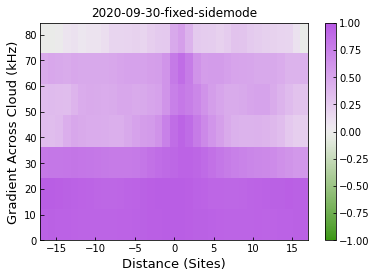

In [ ]:
fig, ax = plt.subplots()
positions = correlations.shape[1]//2
gradient_values = quadcoil_to_gradient(qc_values)
print(gradient_values)
extent = [-positions, positions, 0, 
          np.max(gradient_values) - np.diff(gradient_values)[0]]
cax = ax.imshow(correlations, 
                aspect = "auto", 
                cmap = correlation_colormap, 
                vmin = -1, 
                vmax = 1, 
                extent = extent)
fig.colorbar(cax, ax = ax)
ax.set_xlabel("Distance (Sites)", fontsize = labelsize)
ax.set_ylabel("Gradient Across Cloud (kHz)", fontsize = labelsize)
ax.set_title(f"{folder_name}")
ax.grid(False)
fig.savefig(f"{data_location}/summary_{folder_name}_{str(date.today())}.png", dpi = 200)

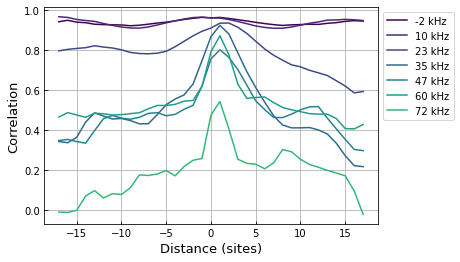

In [ ]:
fig, ax = plt.subplots()

colors = plt.cm.viridis(np.linspace(0,1,len(gradient_values) + 3))
ax.set_prop_cycle('color', colors)
pos = np.arange(-positions, positions + 1)
for c, l in zip(correlations[::-1], gradient_values[::-1]):
    ax.plot(pos, c, label = f"{l:.0f} kHz", )
ax.legend(bbox_to_anchor=(1.0, 1.0), fancybox = True)
ax.set_xlabel("Distance (sites)", fontsize = labelsize)
ax.set_ylabel("Correlation", fontsize = labelsize)
fig.savefig(f"{data_location}/summary_1d_{folder_name}_{str(date.today())}.png", dpi = 200)

##2020-10-07


### Tuning $q$

['/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/QvsGradient/']
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/QvsGradient/PairCreation_QuadCoilFactor0.085_RedAmp0.230_IntDuration2000.000us_154006/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/QvsGradient/PairCreation_QuadCoilFactor0.12_RedAmp0.23_IntDuration2000.00us_150614/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/QvsGradient/PairCreation_QuadCoilFactor0.115_RedAmp0.230_IntDuration2000.000us_154030/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/QvsGradient/PairCreation_QuadCoilFactor0.105_RedAmp0.230_IntDuration2000.000us_153617/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/QvsGradient/PairCreation_QuadCoilFactor0.095_RedAmp0.230_IntDuration2000.000us_153056/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/QvsGradient/PairCreation_QuadCoilFactor0.11_Red

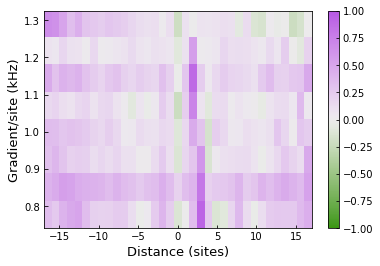

In [ ]:
def value_extractor(folder):
    print(folder)
    subfolder = folder.split("/")[-2]
    value = float(subfolder.split("QuadCoilFactor")[1].split("_")[0])
    return value

folder_name = ""

data_location = f"{drive_location}QvsGradient/{folder_name}"
print(glob.glob(data_location))
qcs, corrs = get_all_correlations(data_location, "1d*total", value_extractor)

fig, ax = plot_2d(corrs, quadcoil_to_gradient(qcs)/17)
ax.set_xlabel("Distance (sites)", fontsize = labelsize)
ax.set_ylabel("Gradient/site (kHz)", fontsize = labelsize)
fig.savefig(f"{data_location}/summary_2d_{folder_name}_{str(date.today())}.png",
            dpi = 200)

##2020-10-08

['/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/QvsGradient/2020-10-08-12ms/PairCreation_IntDuration12000.000us_QuadCoilFactor0.092_195936', '/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/QvsGradient/2020-10-08-12ms/PairCreation_IntDuration12000.000us_QuadCoilFactor0.091_195736', '/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/QvsGradient/2020-10-08-12ms/PairCreation_IntDuration12000.000us_QuadCoilFactor0.090_195621', '/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/QvsGradient/2020-10-08-12ms/PairCreation_IntDuration12000.000us_QuadCoilFactor0.089_195459', '/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/QvsGradient/2020-10-08-12ms/PairCreation_IntDuration12000.000us_QuadCoilFactor0.093_200131', '/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/QvsGradient/2020-10-08-12ms/PairCreation_IntDuration12000.000us_QuadCoilFactor0.087_195144', '/g

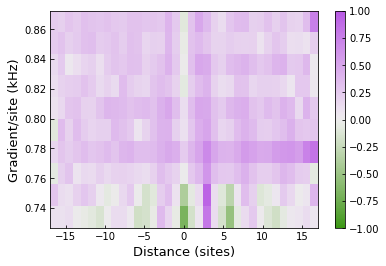

In [ ]:
def value_extractor(folder):
    print(folder)
    subfolder = folder.split("/")[-2]
    value = float(subfolder.split("QuadCoilFactor")[1].split("_")[0])
    return value

folder_name = "2020-10-08-12ms"

data_location = f"{drive_location}QvsGradient/{folder_name}"
print(glob.glob(data_location+ "/*"))
qcs, corrs = get_all_correlations(data_location, "1d*total", value_extractor)

fig, ax = plot_2d(corrs, quadcoil_to_gradient(qcs)/17)
ax.set_xlabel("Distance (sites)", fontsize = labelsize)
ax.set_ylabel("Gradient/site (kHz)", fontsize = labelsize)
fig.savefig(f"{data_location}/summary_2d_{folder_name}_{str(date.today())}.png",
            dpi = 200)

## 2020-10-19 Narrowing Correlations

PairCreation_Gradient_QuadCoilFactor0.5418_184232
PairCreation_Gradient_QuadCoilFactor0.6298_184232
PairCreation_Gradient_QuadCoilFactor0.7327_184232
PairCreation_Gradient_QuadCoilFactor0.8533_184232
PairCreation_Gradient_QuadCoilFactor0.0678_184232
PairCreation_Gradient_QuadCoilFactor0.133_184232
PairCreation_Gradient_QuadCoilFactor0.1512_184232
PairCreation_Gradient_QuadCoilFactor0.1725_184232
PairCreation_Gradient_QuadCoilFactor0.1974_184232
PairCreation_Gradient_QuadCoilFactor0.2266_184232
PairCreation_Gradient_QuadCoilFactor0.2608_184232
PairCreation_Gradient_QuadCoilFactor0.3008_184232
PairCreation_Gradient_QuadCoilFactor0.3477_184232
PairCreation_Gradient_QuadCoilFactor0.4025_184232
PairCreation_Gradient_QuadCoilFactor0.4667_184232
PairCreation_Gradient_QuadCoilFactor0.0748_184232
PairCreation_Gradient_QuadCoilFactor0.0831_184232
PairCreation_Gradient_QuadCoilFactor0.0928_184232
PairCreation_Gradient_QuadCoilFactor0.1041_184232
PairCreation_Gradient_QuadCoilFactor0.1174_184232
[

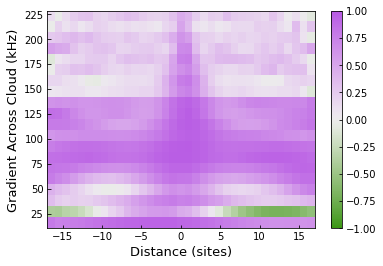

In [ ]:
def value_extractor(folder):
    subfolder = folder.split("/")[-2]
    print(subfolder)
    value = float(subfolder.split("QuadCoilFactor")[1].split("_")[0])
    return value

folder_name = "2020-10-28-onsitelogspacing"

data_location = f"{drive_location}CorrelationVsGradient/{folder_name}"
qcs, corrs = get_all_correlations(data_location, "total*corr_1d", value_extractor)

fig, ax = plot_2d(corrs, quadcoil_to_gradient(qcs))
ax.set_xlabel("Distance (sites)", fontsize = labelsize)
ax.set_ylabel("Gradient Across Cloud (kHz)", fontsize = labelsize)
fig.savefig(f"{data_location}/summary_2d_{folder_name}_{str(date.today())}.png",
            dpi = 200)
fig.savefig(f"{data_location}/summary_2d_{folder_name}_{str(date.today())}.pdf")
print(qcs)

## 2020-11-02 Narrowing Correlations, vary time

PairCreation_iteration_QuadCoilFactor0.3_IntDuration350.0us_113232
PairCreation_iteration_QuadCoilFactor0.025_IntDuration40.0us_113805
PairCreation_iteration_QuadCoilFactor0.15_IntDuration150.0us_121458
PairCreation_iteration_QuadCoilFactor0.125_IntDuration90.0us_121920
PairCreation_iteration_QuadCoilFactor0.175_IntDuration200.0us_122129
PairCreation_iteration_QuadCoilFactor0.25_IntDuration320.0us_130139
PairCreation_iteration_QuadCoilFactor0.1_IntDuration60.0us_144451
PairCreation_iteration_QuadCoilFactor0.05_IntDuration50.0us_144842
PairCreation_iteration_QuadCoilFactor0.075_IntDuration55.0us_145113
PairCreation_iteration_QuadCoilFactor0.275_IntDuration340.0us_150559
PairCreation_iteration_QuadCoilFactor0.225_IntDuration300.0us_151616
PairCreation_iteration_QuadCoilFactor0.2_IntDuration280.0us_152854
[0.3   0.275 0.25  0.225 0.2   0.175 0.15  0.125 0.1   0.075 0.05  0.025]


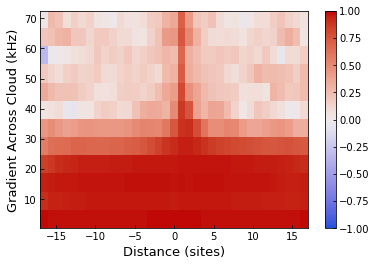

In [ ]:
def value_extractor(folder):
    subfolder = folder.split("/")[-2]
    print(subfolder)
    value = float(subfolder.split("QuadCoilFactor")[1].split("_")[0])
    return value

folder_name = "2020-11-02-fixed-lambdat"

data_location = f"{drive_location}CorrelationVsGradient/{folder_name}"
qcs, corrs = get_all_correlations(data_location, "total*corr_1d", value_extractor)

fig, ax = plot_2d(corrs, quadcoil_to_gradient(qcs))
ax.set_xlabel("Distance (sites)", fontsize = labelsize)
ax.set_ylabel("Gradient Across Cloud (kHz)", fontsize = labelsize)
fig.savefig(f"{data_location}/summary_2d_{folder_name}_{str(date.today())}.png",
            dpi = 200)
fig.savefig(f"{data_location}/summary_2d_{folder_name}_{str(date.today())}.pdf")
print(qcs)

# Correlation vs. Time

## 2020-10-01

In [ ]:
def get_time_correlation(folder, correlation_type = "total"):
    qc = folder.split("/")[-2].split('_')[1]
    qc_val = float(qc.split('IntDuration')[1][:3])
    correlation = glob.glob(f"{folder}/*1d*{correlation_type}.txt")[0]
    return qc_val, np.loadtxt(correlation)
folder_name = "2020-10-06-LongTimes"
data_location = f"{drive_location}CorrelationVsTime/{folder_name}"

all_folders = glob.glob(f"{data_location}/*/")

### Extract parameters/data
values = [get_time_correlation(i, 'total') for i in all_folders]

times, correlations = zip(*values)
times = np.array(times)
correlations = np.array(correlations)

### Sort data for plot
order = np.argsort(times)[::-1]
times = times[order]
correlations = correlations[order]


2d plot

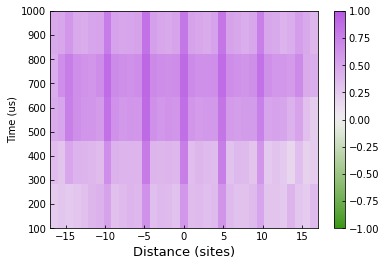

In [ ]:
fig, ax = plot_2d(correlations, times)

ax.set_xlabel("Distance (sites)", fontsize = labelsize)
ax.set_ylabel("Time (us)")

fig.savefig(f"{data_location}/summary_{folder_name}_{str(date.today())}.png", dpi = 200)

1d plot

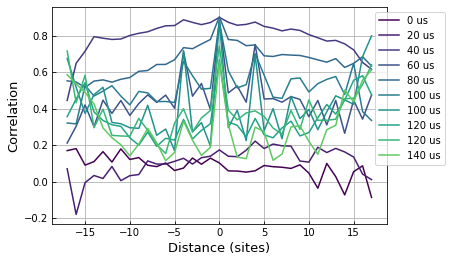

In [ ]:
fig, ax = plt.subplots()

colors = plt.cm.viridis(np.linspace(0,1,len(times) + 3))
ax.set_prop_cycle('color', colors)
pos = np.arange(-positions, positions + 1)
for c, l in zip(correlations[::-1], times[::-1]):
    ax.plot(pos, c, label = f"{l:.0f} us", )
ax.legend(bbox_to_anchor=(0.95, 1.0), fancybox = True)
ax.set_xlabel("Distance (sites)", fontsize = labelsize)
ax.set_ylabel("Correlation", fontsize = labelsize)
fig.savefig(f"{data_location}/summary_1d_{folder_name}_{str(date.today())}.png", bbox_inches ='tight', dpi = 200)

### GIF

In [ ]:
def get_time_correlation2d(folder, correlation_type = "total"):
    qc = folder.split("/")[-2].split('_')[1]
    qc_val = float(qc.split('IntDuration')[1][:3])
    correlation = glob.glob(f"{folder}/*corr_{correlation_type}.txt")[0]
    return qc_val, np.loadtxt(correlation)
    
### Extract parameters/data
values = [get_time_correlation2d(i) for i in all_folders]

times, correlations = zip(*values)
times = np.array(times)
correlations = np.array(correlations)

### Sort data for plot
order = np.argsort(times)
times = times[order]
correlations = correlations[order]

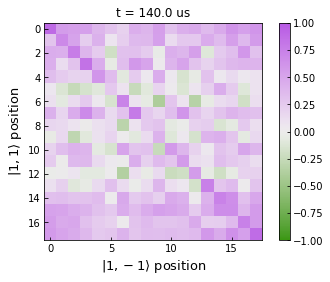

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(correlations[0], 
               animated=True, 
               cmap = correlation_colormap,
               vmin = -1,
               vmax = 1
               )
fig.colorbar(im, ax = ax)
ax.grid(False)
ax.set_xlabel(r"$|1, -1\rangle$ position", fontsize = labelsize)
ax.set_ylabel(r"$|1, 1\rangle$ position", fontsize = labelsize)
def updatefig(i):
    ax.set_title(f"t = {times[i]} us")
    im.set_array(correlations[i])
    return im,

ani = animation.FuncAnimation(fig, updatefig, frames = len(correlations),  blit=True)
ani.save(f"{data_location}/summary_gif_{folder_name}_{str(date.today())}.gif", writer='pillow', fps = 2)

## 2020-10-07

/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsTime/2020-10-07-2sites/PairCreation_ModulationFreqs0.0528_RedAmp0.5_IntDuration200.0us_104817/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsTime/2020-10-07-2sites/PairCreation_ModulationFreqs0.0528_RedAmp0.38_IntDuration400.0us_105421/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsTime/2020-10-07-2sites/PairCreation_ModulationFreqs0.0528_RedAmp0.33_IntDuration600.0us_105813/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsTime/2020-10-07-2sites/PairCreation_ModulationFreqs0.0528_RedAmp0.33_IntDuration800.0us_110144/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsTime/2020-10-07-2sites/PairCreation_ModulationFreqs0.0528_RedAmp0.57_IntDuration100.0us_110950/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsTime/2020-1

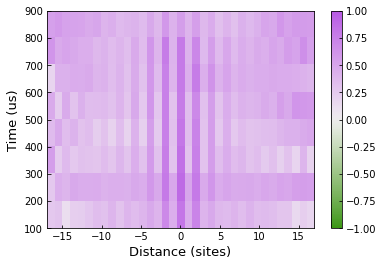

In [ ]:
def value_extractor(folder):
    print(folder)
    subfolder = folder.split("/")[-2]
    value = float(subfolder.split("IntDuration")[1][:4])
    return value

folder_name = "2020-10-07-2sites"

data_location = f"{drive_location}CorrelationVsTime/{folder_name}"
times, corrs = get_all_correlations(data_location, "1d*total", value_extractor)

fig, ax = plot_2d(corrs, times)
print(times)
ax.set_xlabel("Distance (sites)", fontsize = labelsize)
ax.set_ylabel("Time (us)", fontsize = labelsize)
fig.savefig(f"{data_location}/summary_2d_{folder_name}_{str(date.today())}.png",
            dpi = 200)

### GIF

/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsTime/2020-10-07-2sites/PairCreation_ModulationFreqs0.0528_RedAmp0.5_IntDuration200.0us_104817/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsTime/2020-10-07-2sites/PairCreation_ModulationFreqs0.0528_RedAmp0.38_IntDuration400.0us_105421/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsTime/2020-10-07-2sites/PairCreation_ModulationFreqs0.0528_RedAmp0.33_IntDuration600.0us_105813/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsTime/2020-10-07-2sites/PairCreation_ModulationFreqs0.0528_RedAmp0.33_IntDuration800.0us_110144/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsTime/2020-10-07-2sites/PairCreation_ModulationFreqs0.0528_RedAmp0.57_IntDuration100.0us_110950/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsTime/2020-1

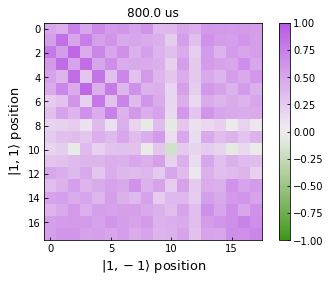

In [ ]:
times, corrs = get_all_correlations(data_location, "corr_total", value_extractor)
times = times[::-1]
corrs = corrs[::-1]
ani = make_animation(corrs, times)
ani.save(f"{data_location}/summary_gif_{folder_name}_{str(date.today())}.gif", writer='pillow', fps = 2)

# Correlation vs. Sideband Frequency

## 2020-10-06 Long Time 5 Sites

In [ ]:
def get_time_correlation(folder, correlation_type = "total"):
    qc = folder.split("/")[-2].split('_')[1]
    qc_val = float(qc.split('ModulationFreqs')[1])
    correlation = glob.glob(f"{folder}/*1d*{correlation_type}.txt")
    print(correlation)
    return qc_val, np.loadtxt(correlation[0])
folder_name = "2020-10-06-LongTime5Sites"
data_location = f"{drive_location}CorrelationVsFreq/{folder_name}"

all_folders = glob.glob(f"{data_location}/*/")
print(all_folders)
### Extract parameters/data
values = [get_time_correlation(i, 'total') for i in all_folders]

freqs, correlations = zip(*values)
freqs = np.array(freqs)
correlations = np.array(correlations)

### Sort data for plot
order = np.argsort(freqs)[::-1]

freqs = freqs[order]
correlations = correlations[order]
print(freqs)

['/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsFreq/2020-10-06-LongTime5Sites/PairCreation_ModulationFreqs0.13_170353/', '/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsFreq/2020-10-06-LongTime5Sites/PairCreation_ModulationFreqs0.129_171015/', '/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsFreq/2020-10-06-LongTime5Sites/PairCreation_ModulationFreqs0.129_171212/', '/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsFreq/2020-10-06-LongTime5Sites/PairCreation_ModulationFreqs0.128_171535/', '/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsFreq/2020-10-06-LongTime5Sites/PairCreation_ModulationFreqs0.127_171838/', '/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsFreq/2020-10-06-LongTime5Sites/PairCreation_ModulationFreqs0.131_172925/', '/gdrive/Shared drives/Cavity Driv

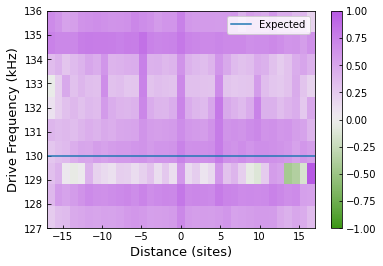

In [ ]:
fig, ax = plot_2d(correlations, freqs * 1000)
ax.set_xlabel("Distance (sites)", fontsize = labelsize)
ax.set_ylabel("Drive Frequency (kHz)", fontsize = labelsize)
ax.axhline(130, label = "Expected")
ax.legend()
fig.savefig(f"{data_location}/summary_2d_{folder_name}_{str(date.today())}.png", bbox_inches ='tight', dpi = 200)

## 2020-10-07 "Canceled" $q$

/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsFreq/2020-10-07-CanceledLocal4-5sites/PairCreation_ModulationFreqs0.0207_164101/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsFreq/2020-10-07-CanceledLocal4-5sites/PairCreation_ModulationFreqs0.0202_164400/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsFreq/2020-10-07-CanceledLocal4-5sites/PairCreation_ModulationFreqs0.0212_163624/
[0.0212 0.0207 0.0202]


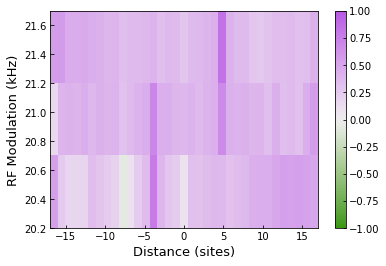

In [ ]:
def value_extractor(folder):
    print(folder)
    subfolder = folder.split("/")[-2]
    value = float(subfolder.split("ModulationFreqs")[1][:6])
    return value

folder_name = "2020-10-07-CanceledLocal4-5sites"

data_location = f"{drive_location}CorrelationVsFreq/{folder_name}"

values, corrs = get_all_correlations(data_location, "1d*total", value_extractor)

print(values)

fig, ax = plot_2d(corrs, values * 1000)

ax.set_xlabel("Distance (sites)", fontsize = labelsize)
ax.set_ylabel("RF Modulation (kHz)", fontsize = labelsize)
fig.savefig(f"{data_location}/summary_2d_{folder_name}_{str(date.today())}.png",
            dpi = 200)

## 2020-10-09 Single diagonal correlations

/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsFreq/2020-10-08-12ms/PairCreation_ModulationFreqs0.0005_105110/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsFreq/2020-10-08-12ms/PairCreation_ModulationFreqs0.0004_105252/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsFreq/2020-10-08-12ms/PairCreation_ModulationFreqs0.0003_105433/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsFreq/2020-10-08-12ms/PairCreation_ModulationFreqs0.0006_105843/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsFreq/2020-10-08-12ms/PairCreation_ModulationFreqs0.0007_105849/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsFreq/2020-10-08-12ms/PairCreation_ModulationFreqs0.0008_110321/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsFreq/2020-10-08-12ms/

No handles with labels found to put in legend.


[0.0027 0.0026 0.0025 0.0024 0.0023 0.0022 0.0021 0.002  0.0019 0.0018
 0.0017 0.0016 0.0015 0.0014 0.0013 0.0012 0.0011 0.001  0.0009 0.0008
 0.0007 0.0006 0.0005 0.0004 0.0003]


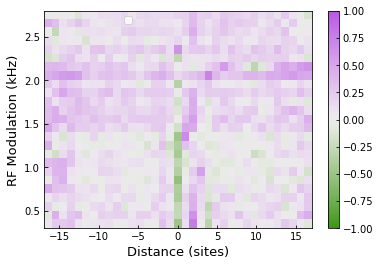

In [ ]:
def value_extractor(folder):
    print(folder)
    subfolder = folder.split("/")[-2]
    value = float(subfolder.split("ModulationFreqs")[1].split("_")[0])
    return value

folder_name = "2020-10-08-12ms"

data_location = f"{drive_location}CorrelationVsFreq/{folder_name}"

values, corrs = get_all_correlations(data_location, "1d*total", value_extractor)

print(values)

fig, ax = plot_2d(corrs, values * 1000)

ax.set_xlabel("Distance (sites)", fontsize = labelsize)
ax.set_ylabel("RF Modulation (kHz)", fontsize = labelsize)
#ax.axhline(0.35, ls = '--', label = "$n$ sites")
#ax.axhline(0.95, ls = '--', )
#ax.axhline(1.35, ls = '--', )
#ax.axhline(2.05, ls = '--', )
#ax.axhline(2.35, ls = '--', )

#ax.axhline(2.15, ls = "--", c = "tab:red", label = "Confusion")
ax.legend(bbox_to_anchor=(0.35, 1.0), fancybox = True)
fig.savefig(f"{data_location}/summary_2d_{folder_name}_{str(date.today())}.png",
            bbox_tight = True,
            dpi = 200)

## 2020-10-12 Negative/Positive $\chi$

In [ ]:
def value_extractor(folder):
    subfolder = folder.split("/")[-2]
    print(subfolder)
    value = float(subfolder.split("ModulationFreqs")[1].split("_")[0])
    return value

folder_name = "2020-10-12-negativechi"

data_location = f"{drive_location}CorrelationVsFreq/{folder_name}"

values, corrs = get_all_correlations(data_location, "1d*total", value_extractor)

print(values)

fig, ax = plot_2d(corrs, values * 1000)

ax.set_xlabel("Distance (sites)", fontsize = labelsize)
ax.set_ylabel("RF Modulation (kHz)", fontsize = labelsize)
#ax.axhline(0.35, ls = '--', label = "$n$ sites")
#ax.axhline(0.95, ls = '--', )
#ax.axhline(1.35, ls = '--', )
#ax.axhline(2.05, ls = '--', )
#ax.axhline(2.35, ls = '--', )

#ax.axhline(2.15, ls = "--", c = "tab:red", label = "Confusion")
ax.legend(bbox_to_anchor=(0.35, 1.0), fancybox = True)
fig.savefig(f"{data_location}/summary_2d_{folder_name}_{str(date.today())}.png",
            bbox_tight = True,
            dpi = 200)

NameError: ignored

##2020-10-20 Frequency V

### Filtered

In [ ]:
def value_extractor(folder):
    subfolder = folder.split("/")[-2]
    print(subfolder)
    value = float(subfolder.split("ModulationFreqs")[1].split("_")[0])
    return value

def get_corr(folder):
    fits = np.load(f"{folder}/all_fits.npy")
    labels = list(np.load(f"{folder}/roi_labels.npy"))
    m = fits[:, labels.index("roi1-1")]
    p = fits[:, labels.index("roi11")]
    z = fits[:, labels.index("roi10")]
    f2 = fits[:]

folder_name = "2020-10-20-200us"

data_location = f"{drive_location}CorrelationVsFreq/{folder_name}"

### Non-filtered

PairCreation_iteration_ModulationFreqs0.0998_151453
PairCreation_iteration_ModulationFreqs0.187_152035
PairCreation_iteration_ModulationFreqs0.0873_154226
PairCreation_iteration_ModulationFreqs0.1371_160126
PairCreation_iteration_ModulationFreqs0.0125_163739
PairCreation_iteration_ModulationFreqs0.1121_164258
PairCreation_iteration_ModulationFreqs0.0623_164645
PairCreation_iteration_ModulationFreqs0.0249_165527
PairCreation_iteration_ModulationFreqs0.1246_165841
PairCreation_iteration_ModulationFreqs0.1744_170259
PairCreation_iteration_ModulationFreqs0.0748_170611
PairCreation_iteration_ModulationFreqs0.1994_155424
PairCreation_iteration_ModulationFreqs0.0498_170839
PairCreation_iteration_ModulationFreqs0.0374_171348
PairCreation_iteration_ModulationFreqs0.162_171716
PairCreation_iteration_ModulationFreqs0.1495_172025
PairCreation_iteration_ModulationFreqs0.2118_172428
PairCreation_iteration_ModulationFreqs0_172754
0.2118 16.9983948635634
0.1994 16.003210272873194
0.187 15.008025682182

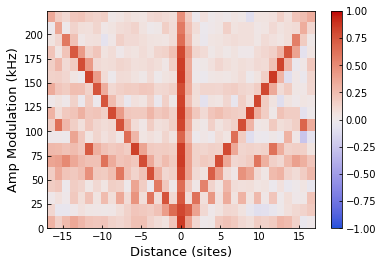

In [ ]:
def value_extractor(folder):
    subfolder = folder.split("/")[-2]
    print(subfolder)
    value = float(subfolder.split("ModulationFreqs")[1].split("_")[0])
    return value

folder_name = "2020-10-20-200us"

data_location = f"{drive_location}CorrelationVsFreq/{folder_name}"

values, corrs = get_all_correlations(data_location, "total*1d", value_extractor)

for i in values:
    print(i, i/0.01246)
fig, ax = plot_2d(corrs, values * 1000)

ax.set_xlabel("Distance (sites)", fontsize = labelsize)
ax.set_ylabel("Amp Modulation (kHz)", fontsize = labelsize)

fig.savefig(f"{data_location}/summary_2d_{folder_name}_{str(date.today())}.png",
            bbox_tight = True,
            dpi = 200)

fig.savefig(f"{data_location}/summary_2d_{folder_name}_{str(date.today())}.pdf",
            bbox_tight = True)

## 2020-10-20 Frequency Inset

PairCreation_iteration_ModulationFreqs0.1121_173746
PairCreation_iteration_ModulationFreqs0.1221_174800
PairCreation_iteration_ModulationFreqs0.1171_174252
PairCreation_iteration_ModulationFreqs0.1246_174048
PairCreation_iteration_ModulationFreqs0.1146_174958
PairCreation_iteration_ModulationFreqs0.1196_175423
PairCreation_iteration_ModulationFreqs0.1271_180132
PairCreation_iteration_ModulationFreqs0.1096_180147
PairCreation_iteration_ModulationFreqs0.1296_180736
PairCreation_iteration_ModulationFreqs0.1072_180747
PairCreation_iteration_ModulationFreqs0.1321_181519
PairCreation_iteration_ModulationFreqs0.1371_181526
PairCreation_iteration_ModulationFreqs0.1134_181854
PairCreation_iteration_ModulationFreqs0.1346_182622
PairCreation_iteration_ModulationFreqs0.1396_182937
PairCreation_iteration_ModulationFreqs0.142_182946
PairCreation_iteration_ModulationFreqs0.1184_184028
PairCreation_iteration_ModulationFreqs0.1234_184501
PairCreation_iteration_ModulationFreqs0.1209_184746
PairCreation_

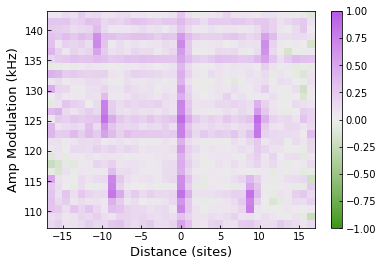

In [ ]:
def value_extractor(folder):
    subfolder = folder.split("/")[-2]
    print(subfolder)
    value = float(subfolder.split("ModulationFreqs")[1].split("_")[0])
    return value

folder_name = "2020-10-20-inset"

data_location = f"{drive_location}CorrelationVsFreq/{folder_name}"

values, corrs = get_all_correlations(data_location, "total*1d", value_extractor)

print(len((values/0.01246)[::-1]))

fig, ax = plot_2d(corrs, values * 1000)

ax.set_xlabel("Distance (sites)", fontsize = labelsize)
ax.set_ylabel("Amp Modulation (kHz)", fontsize = labelsize)
#ax.axhline(0.35, ls = '--', label = "$n$ sites")
#ax.axhline(0.95, ls = '--', )
#ax.axhline(1.35, ls = '--', )
#ax.axhline(2.05, ls = '--', )
#ax.axhline(2.35, ls = '--', )

#ax.axhline(2.15, ls = "--", c = "tab:red", label = "Confusion")
fig.savefig(f"{data_location}/summary_2d_{folder_name}_{str(date.today())}.png",
            bbox_tight = True,
            dpi = 200)

## 2020-10-29 Set 1

PairCreation_GradientPerSite_IntDuration400.0us_GradientPerSite0.0254_202020
0.0254
PairCreation_GradientPerSite_IntDuration400.0us_GradientPerSite0.0244_202020
0.0244
PairCreation_GradientPerSite_IntDuration400.0us_GradientPerSite0.0256_202020
0.0256
PairCreation_GradientPerSite_IntDuration400.0us_GradientPerSite0.0251_202020
0.0251
PairCreation_GradientPerSite_IntDuration400.0us_GradientPerSite0.0241_202020
0.0241
PairCreation_GradientPerSite_IntDuration400.0us_GradientPerSite0.0236_202020
0.0236
PairCreation_GradientPerSite_IntDuration400.0us_GradientPerSite0.0246_202020
0.0246
PairCreation_GradientPerSite_IntDuration400.0us_GradientPerSite0.0249_202020
0.0249
PairCreation_GradientPerSite_IntDuration400.0us_GradientPerSite0.0239_202020
0.0239
9
[0.0256 0.0254 0.0251 0.0249 0.0246 0.0244 0.0241 0.0239 0.0236]


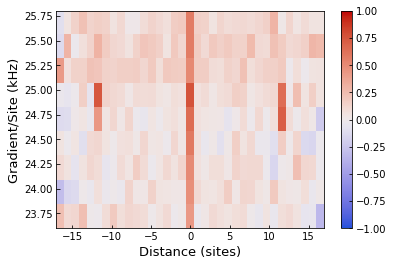

In [ ]:
def value_extractor(folder):
    subfolder = folder.split("/")[-2]
    print(subfolder)
    string =subfolder.split("GradientPerSite")[2].split("_")[0]
    print(string)
    value = float(string)
    return value

folder_name = "2020-10-29-12site-10_Bloch_Periods"

data_location = f"{drive_location}CorrelationVsFreq/{folder_name}"

values, corrs = get_all_correlations(data_location, "total*1d", value_extractor)

print(len((values/0.01246)[::-1]))

print(values)
fig, ax = plot_2d(corrs, values * 1000)

ax.set_xlabel("Distance (sites)", fontsize = labelsize)
ax.set_ylabel("Gradient/Site (kHz)", fontsize = labelsize)

fig.savefig(f"{data_location}/summary_2d_{folder_name}_{str(date.today())}.png",
            bbox_tight = True,
            dpi = 200)

##2020-10-30 200 kHz 800us

PairCreation_GradientPerSite_ModulationFreqs160.56kHz_160638
160.56
PairCreation_GradientPerSite_ModulationFreqs157.56kHz_160638
157.56
PairCreation_GradientPerSite_ModulationFreqs139.56kHz_160638
139.56
PairCreation_GradientPerSite_ModulationFreqs145.56kHz_160638
145.56
PairCreation_GradientPerSite_ModulationFreqs151.56kHz_160638
151.56
PairCreation_GradientPerSite_ModulationFreqs148.56kHz_160638
148.56
PairCreation_GradientPerSite_ModulationFreqs136.56kHz_160638
136.56
PairCreation_GradientPerSite_ModulationFreqs154.56kHz_160638
154.56
PairCreation_GradientPerSite_ModulationFreqs142.56kHz_160638
142.56
9
[160.56 157.56 154.56 151.56 148.56 145.56 142.56 139.56 136.56]


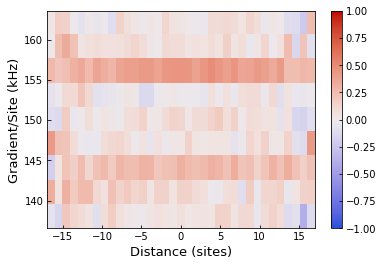

In [ ]:
def value_extractor(folder):
    subfolder = folder.split("/")[-2]
    print(subfolder)
    string =subfolder.split("ModulationFreqs")[1].split("kHz")[0]
    print(string)
    value = float(string)
    return value

folder_name = "2020-10-30-12site"

data_location = f"{drive_location}CorrelationVsFreq/{folder_name}"

values, corrs = get_all_correlations(data_location, "total*1d", value_extractor)

print(len((values/0.01246)[::-1]))

print(values)
fig, ax = plot_2d(corrs, values)

ax.set_xlabel("Distance (sites)", fontsize = labelsize)
ax.set_ylabel("Gradient/Site (kHz)", fontsize = labelsize)

fig.savefig(f"{data_location}/summary_2d_{folder_name}_{str(date.today())}.png",
            bbox_tight = True,
            dpi = 200)

##2020-11-02 4 Sites

PairCreation_iteration_GradientPerSite12.15kHz_162756
12.15
PairCreation_iteration_GradientPerSite12.2929kHz_162756
12.2929
PairCreation_iteration_GradientPerSite12.5786kHz_162756
12.5786
PairCreation_iteration_GradientPerSite12.4357kHz_162756
12.4357
PairCreation_iteration_GradientPerSite12.65kHz_162756
12.65
PairCreation_iteration_GradientPerSite12.3643kHz_162756
12.3643
PairCreation_iteration_GradientPerSite12.2214kHz_162756
12.2214
PairCreation_iteration_GradientPerSite12.5071kHz_162756
12.5071
8
[12.65   12.5786 12.5071 12.4357 12.3643 12.2929 12.2214 12.15  ]


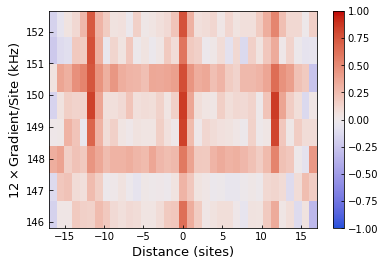

In [ ]:
def value_extractor(folder):
    subfolder = folder.split("/")[-2]
    print(subfolder)
    string =subfolder.split("GradientPerSite")[1].split("kHz")[0]
    print(string)
    value = float(string)
    return value

folder_name = "2020-11-02-12site-2"

data_location = f"{drive_location}CorrelationVsFreq/{folder_name}"

values, corrs = get_all_correlations(data_location, "total*1d", value_extractor)

print(len((values/0.01246)[::-1]))

print(values)
fig, ax = plot_2d(corrs, values * 12)

ax.set_xlabel("Distance (sites)", fontsize = labelsize)
ax.set_ylabel(r"$12\times$Gradient/Site (kHz)", fontsize = labelsize)

fig.savefig(f"{data_location}/summary_2d_{folder_name}_{str(date.today())}.png",
            bbox_tight = True,
            dpi = 200)

##2020-11-04 Small Gradient Calibration

PairCreation_ModulationFreqs_ModulationFreqs25.6667kHz_144417
25.6667
PairCreation_ModulationFreqs_ModulationFreqs25.8889kHz_144417
25.8889
PairCreation_ModulationFreqs_ModulationFreqs26.1111kHz_144417
26.1111
PairCreation_ModulationFreqs_ModulationFreqs26.3333kHz_144417
26.3333
PairCreation_ModulationFreqs_ModulationFreqs26.5556kHz_144417
26.5556
PairCreation_ModulationFreqs_ModulationFreqs26.7778kHz_144417
26.7778
PairCreation_ModulationFreqs_ModulationFreqs25.0kHz_144417
25.0
PairCreation_ModulationFreqs_ModulationFreqs25.2222kHz_144417
25.2222
PairCreation_ModulationFreqs_ModulationFreqs25.4444kHz_144417
25.4444
9
[26.7778 26.5556 26.3333 26.1111 25.8889 25.6667 25.4444 25.2222 25.    ]


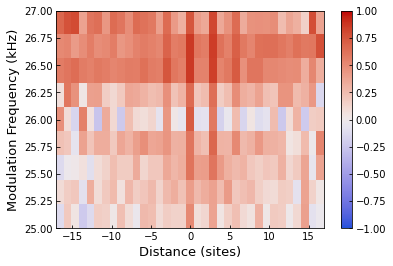

In [ ]:
def value_extractor(folder):
    subfolder = folder.split("/")[-2]
    print(subfolder)
    string =subfolder.split("ModulationFreqs")[-1].split("kHz")[0]
    print(string)
    value = float(string)
    return value

folder_name = "2020-11-20-CheckGradient45Deg"

data_location = f"{drive_location}CorrelationVsFreq/{folder_name}"

values, corrs = get_all_correlations(data_location, "total*1d", value_extractor)

print(len((values/0.01246)[::-1]))

print(values)
fig, ax = plot_2d(corrs, values)

ax.set_xlabel("Distance (sites)", fontsize = labelsize)
ax.set_ylabel(r"Modulation Frequency (kHz)", fontsize = labelsize)

fig.savefig(f"{data_location}/summary_2d_{folder_name}_{str(date.today())}.png",
            bbox_tight = True,
            dpi = 200)

# Correlation Vs. Power

PairCreation_ModulationAmps_ModulationAmps0.7_172614
0.7
PairCreation_ModulationAmps_ModulationAmps0.2_172614
0.2
PairCreation_ModulationAmps_ModulationAmps0.9_172614
0.9
PairCreation_ModulationAmps_ModulationAmps0.1_172614
0.1
PairCreation_ModulationAmps_ModulationAmps0.4_172614
0.4
PairCreation_ModulationAmps_ModulationAmps1.0_172614
1.0
PairCreation_ModulationAmps_ModulationAmps0.8_172614
0.8
PairCreation_ModulationAmps_ModulationAmps0.0_172614
0.0
PairCreation_ModulationAmps_ModulationAmps0.6_172614
0.6
PairCreation_ModulationAmps_ModulationAmps0.3_172614
0.3
PairCreation_ModulationAmps_ModulationAmps0.5_172614
0.5
11
[1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1 0. ]


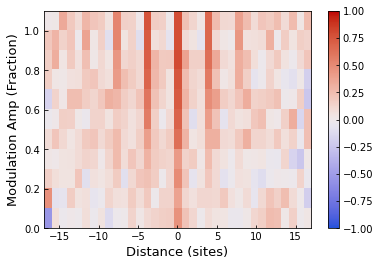

In [ ]:
def value_extractor(folder):
    subfolder = folder.split("/")[-2]
    print(subfolder)
    string =subfolder.split("ModulationAmps")[-1].split("_")[0]
    print(string)
    value = float(string)
    return value

folder_name = "2020-11-02-modulationamp-4sites"

data_location = f"{drive_location}CorrelationVsPower/{folder_name}"

values, corrs = get_all_correlations(data_location, "total*1d", value_extractor)

print(len((values/0.01246)[::-1]))

print(values)
fig, ax = plot_2d(corrs, values)

ax.set_xlabel("Distance (sites)", fontsize = labelsize)
ax.set_ylabel(r"Modulation Amp (Fraction)", fontsize = labelsize)

fig.savefig(f"{data_location}/summary_2d_{folder_name}_{str(date.today())}.png",
            bbox_tight = True,
            dpi = 200)

In [ ]:
fig, ax = plot_2d(correlations, freqs)
ax.set_xlabel("Distance (sites)", fontsize = labelsize)
ax.set_ylabel("Drive Power (Amplitude)", fontsize = labelsize)
fig.savefig(f"{data_location}/summary_2d_{folder_name}_{str(date.today())}.png", bbox_inches ='tight', dpi = 200)

NameError: ignored

##2020-10-07

['/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsPower/2020-10-07-2Sites']
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsPower/2020-10-07-2Sites/PairCreation_ModulationFreqs0.0528_RedAmp0.42_IntDuration500.00us_121017/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsPower/2020-10-07-2Sites/PairCreation_ModulationFreqs0.0528_RedAmp0.32_IntDuration500.00us_121017/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsPower/2020-10-07-2Sites/PairCreation_ModulationFreqs0.0528_RedAmp0.39_IntDuration500.00us_121017/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsPower/2020-10-07-2Sites/PairCreation_ModulationFreqs0.0528_RedAmp0.00_IntDuration500.00us_121017/
/gdrive/Shared drives/Cavity Drive/CavityLab Analysis/2020_PairCreation/CorrelationVsPower/2020-10-07-2Sites/PairCreation_ModulationFreqs0.0528_RedAmp0.27_

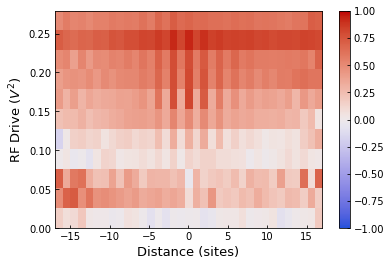

In [ ]:
def value_extractor(folder):
    print(folder)
    subfolder = folder.split("/")[-2]
    value = float(subfolder.split("RedAmp")[1].split("_")[0])
    return value

folder_name = "2020-10-07-2Sites"

data_location = f"{drive_location}CorrelationVsPower/{folder_name}"
print(glob.glob(data_location))
times, corrs = get_all_correlations(data_location, "1d*total", value_extractor)

fig, ax = plot_2d(corrs, times**2)
print(times)
ax.set_xlabel("Distance (sites)", fontsize = labelsize)
ax.set_ylabel("RF Drive ($V^2$)", fontsize = labelsize)
fig.savefig(f"{data_location}/summary_2d_{folder_name}_{str(date.today())}.png",
            dpi = 200)

In [ ]:
import numpy as np
freqs = np.arange(90.5, 93.5, 0.1)
np.random.random(len(freqs)) * 360

array([ 15.69023084, 304.02964775, 125.72839153, 150.13410788,
        37.93962388, 234.48629935, 240.56100947, 349.34471635,
       322.53449526, 330.26119393, 351.27238933, 213.96260036,
        43.4632218 , 281.34096878, 233.45653187, 228.23979271,
        15.3388482 , 153.48873675, 118.35082604, 192.399531  ,
       142.40674992,  12.47137451, 316.8247092 ,  85.49349573,
       204.90416224, 273.55043311, 109.73087122, 169.6292136 ,
       230.33262083,  24.67194478])

In [ ]:
def value_extractor(folder):
    subfolder = folder.split("/")[-2]
    print(subfolder)
    value = float(subfolder.split("RedAmp")[1].split("_")[0])
    return value

folder_name = "2020-10-29-2sites"

data_location = f"{drive_location}CorrelationVsPower/{folder_name}"
qcs, corrs = get_all_correlations(data_location, "total*corr_1d", value_extractor)

fig, ax = plot_2d(corrs, qcs**2)
ax.set_xlabel("Distance (sites)", fontsize = labelsize)
ax.set_ylabel("RF Amp ", fontsize = labelsize)
fig.savefig(f"{data_location}/summary_2d_{folder_name}_{str(date.today())}.png",
            dpi = 200)
fig.savefig(f"{data_location}/summary_2d_{folder_name}_{str(date.today())}.pdf")
print(qcs)

NameError: ignored

# Correlations vs. Phase

# Q vs. Correlations

PairCreation_iteration_ModulationPhases135.0_170509
135.0
PairCreation_iteration_ModulationPhases90.0_170509
90.0
PairCreation_iteration_ModulationPhases45.0_170509
45.0
PairCreation_iteration_ModulationPhases0.0_170509
0.0
PairCreation_iteration_ModulationPhases180.0_170509
180.0
5
[180. 135.  90.  45.   0.]


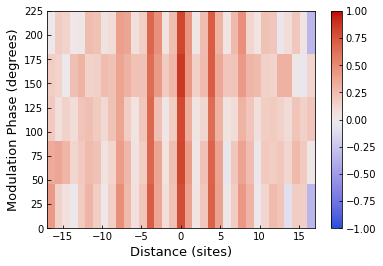

In [ ]:
def value_extractor(folder):
    subfolder = folder.split("/")[-2]
    print(subfolder)
    string =subfolder.split("ModulationPhases")[1].split("_")[0]
    print(string)
    value = float(string)
    return value

folder_name = "2020-11-02-4sites-set2"

data_location = f"{drive_location}CorrelationVsPhase/{folder_name}"

values, corrs = get_all_correlations(data_location, "total*1d", value_extractor)

print(len((values/0.01246)[::-1]))

print(values)
fig, ax = plot_2d(corrs, values)

ax.set_xlabel("Distance (sites)", fontsize = labelsize)
ax.set_ylabel(r"Modulation Phase (degrees)", fontsize = labelsize)

fig.savefig(f"{data_location}/summary_2d_{folder_name}_{str(date.today())}.png",
            bbox_tight = True,
            dpi = 200)

##2020-10-21 Correlations vs. q/gradient

PairCreation_iteration_QuadCoilFactor0.109_133534
PairCreation_iteration_QuadCoilFactor0.07_133908
PairCreation_iteration_QuadCoilFactor0.0622_134815
PairCreation_iteration_QuadCoilFactor0.083_140900
PairCreation_iteration_QuadCoilFactor0.076_141737
PairCreation_iteration_QuadCoilFactor0.135_141229
PairCreation_iteration_QuadCoilFactor0.187_134840
PairCreation_iteration_QuadCoilFactor0.066_142432
PairCreation_reps_QuadCoilFactor0.0934_145542
PairCreation_iteration_QuadCoilFactor0.1003_150445
PairCreation_iteration_QuadCoilFactor0.1558_150414
PairCreation_iteration_QuadCoilFactor0.343_145935
PairCreation_iteration_QuadCoilFactor0.079_150929
PairCreation_iteration_QuadCoilFactor0.0677_150955
PairCreation_iteration_QuadCoilFactor0.0638_151625
PairCreation_iteration_QuadCoilFactor0.1201_151639
PairCreation_iteration_QuadCoilFactor0.0726_151648
PairCreation_iteration_QuadCoilFactor0.239_151703
PairCreation_iteration_QuadCoilFactor0.0877_151655
PairCreation_iteration_QuadCoilFactor0.0607_154

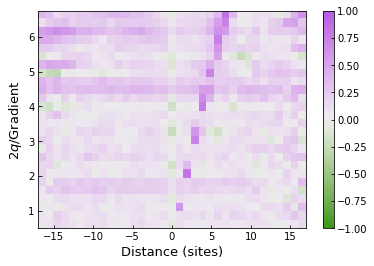

In [ ]:
def value_extractor(folder):
    subfolder = folder.split("/")[-2]
    print(subfolder)
    value = float(subfolder.split("QuadCoilFactor")[1].split("_")[0])
    return value

folder_name = "2020-10-21-LinearQ-pt2"

data_location = f"{drive_location}QvsGradient/{folder_name}"

values, corrs = get_all_correlations(data_location, "total*1d", value_extractor)

print(values)
values = 0.156/( values - 0.031)
print(values)
fig, ax = plot_2d(corrs[::-1], values)

ax.set_xlabel("Distance (sites)", fontsize = labelsize)
ax.set_ylabel("$2q$/Gradient", fontsize = labelsize)
#ax.axhline(0.35, ls = '--', label = "$n$ sites")
#ax.axhline(0.95, ls = '--', )
#ax.axhline(1.35, ls = '--', )
#ax.axhline(2.05, ls = '--', )
#ax.axhline(2.35, ls = '--', )

#ax.axhline(2.15, ls = "--", c = "tab:red", label = "Confusion")
fig.savefig(f"{data_location}/summary_2d_{folder_name}_{str(date.today())}.png",
            bbox_tight = True,
            dpi = 200)

# Phase Diagram

## Sidemode population vs. Time + Gradient

In [ ]:
def get_value_fits_labels(folder, value_extractor = False):
    if not value_extractor:
        qc = folder.split("/")[-2].split('_')[2]
        qc_val = float(qc.split('r')[1])
    else:
        qc_val = value_extractor(folder)
    fits = [np.loadtxt(glob.glob(f"{folder}/*roi{i}_1d.txt")[0]) for i in ['1-1', '10', '11']]
    #labels = list(np.load(f"{folder}/roi_labels.npy", allow_pickle =True))
    return qc_val, fits

def get_all_fits(data_location, value_extractor):
    all_folders = glob.glob(f"{data_location}/*/")
    ### Extract parameters/data
    values = [get_value_fits_labels(i, value_extractor) for i in all_folders]
    
    qc_values, correlations = zip(*values)
    
    qc_values = np.array(qc_values)
    correlations = np.array(correlations)
    
    ### Sort data for plot
    order = np.argsort(qc_values)[::-1]
    qc_values = qc_values[order]
    correlations = correlations[order]
    return qc_values, correlations, 

In [ ]:
from scipy import optimize

def sidemode_summary(fits, times, values):
    fig, ax = plt.subplots()
    # fits is parameter * 3 states * n_times
    sidemode = fits[:, 0, :] + fits[:, 2, :]
    total = sidemode + fits[:, 1, :]
    sidemode_fraction = sidemode/total
    extent = [np.min(times),  
              np.mean(np.diff(times)) + np.max(times), 
              np.min(values),
              np.mean(np.diff(values)) + np.max(values), 
              
              ]
    cax = ax.imshow(sidemode_fraction, extent = extent, aspect = "auto")
    ax.grid(False)
    fig.colorbar(cax, ax = ax, label = "Fractional Sidemode Population")
    fits = [extract_sidemode_fit(times, sidemode_fraction[i]) for i in range(len(fits))]
    lambdas = np.array([i[0][0] for i in fits])
    lambdas_err = np.array([np.sqrt(np.diag(i[1]))[0] for i in fits])

    fig2, ax2 = plt.subplots()
    transparent_edge_plot(ax2, values, 1/lambdas, lambdas_err * (1/lambdas**2))
    ax2.set_ylabel("$1/\lambda$ ($\mu$s)", fontsize = labelsize)
    return fig, ax, fig2, ax2

def growth_function(t, L, saturation, initial):
    return np.clip(initial +  (initial + 1) * (np.cosh(t * L) - 1), None, saturation)

def extract_sidemode_fit(t, sidemode, plot = True):
    try:
        guess = [1/(np.mean(t)), np.max(sidemode), np.min(sidemode)]
        if plot:
            fig, ax = plt.subplots()
            ax.plot(t, sidemode, 'o')
        popt, pcov = optimize.curve_fit(growth_function, t, sidemode, 
                                        p0 = guess, 
                                        bounds = ([0, 0, np.min(sidemode)/1.6], 
                                                  [np.inf, 2 * np.max(sidemode), 1.6 * np.min(sidemode)]))
        if plot:
            ax.plot(t, growth_function(t, *popt))
        return popt, pcov
    except Exception as e:
        print(e)




PairCreation_QuadCoil_QuadCoilFactor0.25_RedAmp0.7_200053
PairCreation_QuadCoil_QuadCoilFactor0.125_RedAmp0.7_200053
PairCreation_QuadCoil_QuadCoilFactor0.225_RedAmp0.7_200053
PairCreation_QuadCoil_QuadCoilFactor0.275_RedAmp0.7_200053
PairCreation_QuadCoil_QuadCoilFactor0.15_RedAmp0.7_200053
PairCreation_QuadCoil_QuadCoilFactor0.175_RedAmp0.7_200053
PairCreation_QuadCoil_QuadCoilFactor0.1_RedAmp0.7_200053
PairCreation_QuadCoil_QuadCoilFactor0.025_RedAmp0.7_200053
PairCreation_QuadCoil_QuadCoilFactor0.075_RedAmp0.7_200053
PairCreation_QuadCoil_QuadCoilFactor0.05_RedAmp0.7_200053
PairCreation_QuadCoil_QuadCoilFactor0.2_RedAmp0.7_200053
PairCreation_QuadCoil_QuadCoilFactor0.3_RedAmp0.7_200053
[(3, 31), (3, 31), (3, 31), (3, 31), (3, 31), (3, 31), (3, 31), (3, 31), (3, 31), (3, 31), (3, 31), (3, 31)]


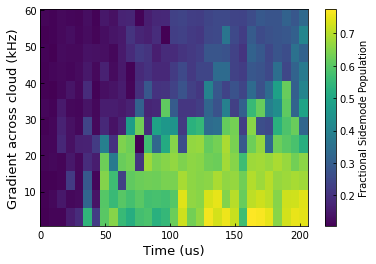

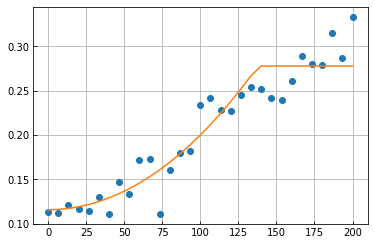

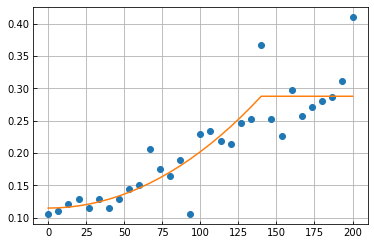

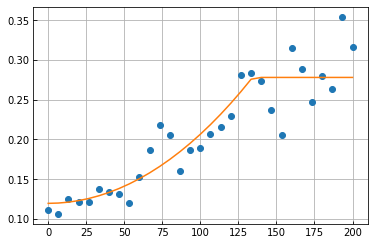

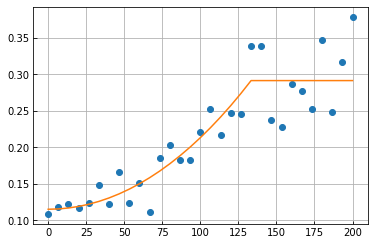

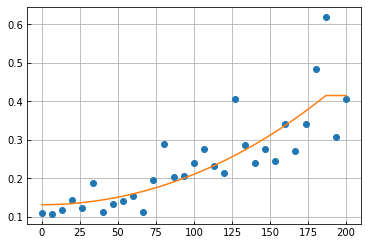

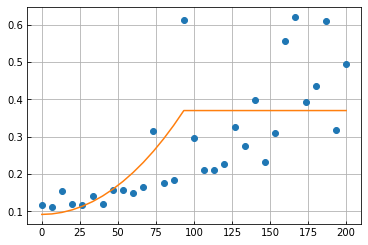

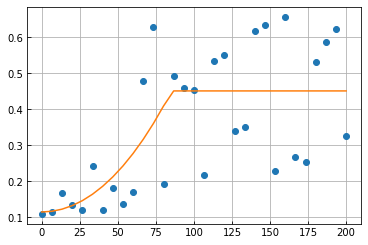

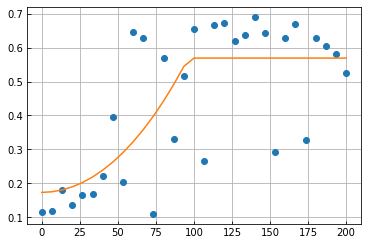

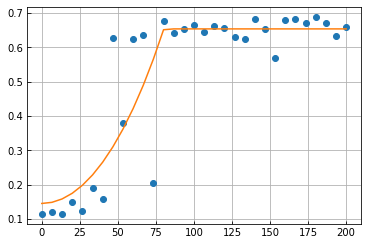

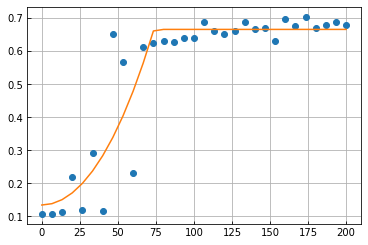

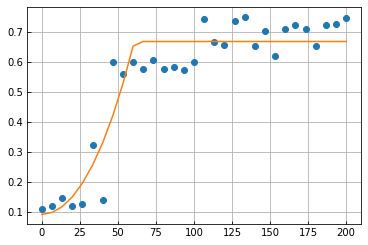

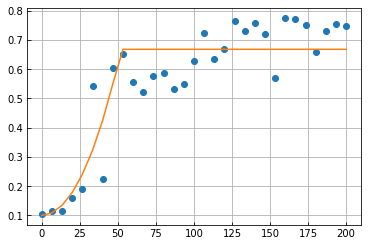

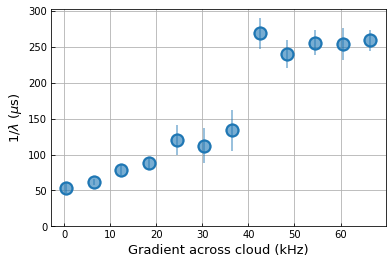

In [ ]:
def value_extractor(folder):
    subfolder = folder.split("/")[-2]
    print(subfolder)
    value = float(subfolder.split("QuadCoilFactor")[1].split("_")[0])
    return value

times = np.linspace(0, 200, 11) # us, values for 0.4, 0.5
#times = np.linspace(0, 50, 10) # us, values for amp = 0.6
times = np.linspace(0, 200, 31) # 2020-10-26 data
folder_name = "2020-10-26/high_power_set2/"

data_location = f"{drive_location}PhaseDiagram/{folder_name}"

values, fits = get_all_fits(data_location, value_extractor)
print([i.shape for i in fits]) 
fig, ax, fig2, ax2 = sidemode_summary(fits, times, quadcoil_to_gradient(values))
ax2.set_xlabel("Gradient across cloud (kHz)", fontsize = labelsize)
ax.set_xlabel("Time (us)", fontsize = labelsize)
ax.set_ylabel("Gradient across cloud (kHz)", fontsize = labelsize)
ax2.set_ylim(0, None)
fig.savefig(f"{data_location}/{folder_name.split('/')[1]}_summary_2d_{str(date.today())}.png", dpi = 200)
fig.savefig(f"{data_location}/{folder_name.split('/')[1]}_summary_2d_{str(date.today())}.pdf")
fig2.savefig(f"{data_location}/{folder_name.split('/')[1]}_summary_lambda_{str(date.today())}.png", dpi = 200)
fig2.savefig(f"{data_location}/{folder_name.split('/')[1]}_summary_lambda_{str(date.today())}.pdf")

# $F_z$ Fluctuations

## Local correlations

In [7]:
local_folder = f"{drive_location}CorrelationVsFreq/2020-10-20-200us/PairCreation_iteration_ModulationFreqs0_172754/"
global_folder = f"{drive_location}CorrelationVsGradient/2020-11-02-fixed-lambdat/PairCreation_iteration_QuadCoilFactor0.025_IntDuration40.0us_113805/"

#folder = f"{drive_location}CorrelationVsGradient/2020-11-02-fixed-lambdat/PairCreation_iteration_QuadCoilFactor0.3_IntDuration350.0us_113232"

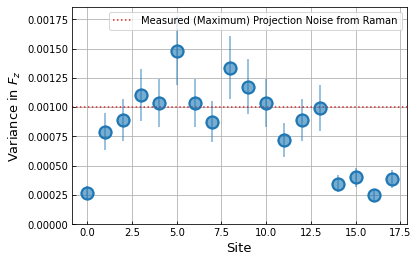

In [12]:
def fz_variance(folder):
    m, p, z = get_values(folder)
    t = m + p + z
    Fz = ((p/t)[:, :] - (m/t)[:, :])
    n_shots, n_traps = Fz.shape
    var = np.var(Fz, axis = 0)
    return var, var * np.sqrt(2/n_shots)

local_var, local_var_se = fz_variance(local_folder)
fig, ax = plt.subplots()
transparent_edge_plot(ax, np.arange(n_traps), var, var * np.sqrt(2/n_shots))
ax.set_ylim(0, None)
ax.set_xlabel("Site", fontsize = labelsize)
ax.set_ylabel("Variance in $F_z$", fontsize = labelsize)
ax.axhline(0.001, c = "tab:red", ls = ":", label = "Measured (Maximum) Projection Noise from Raman")
ax.legend()

### Binned variance?

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero enco

Text(0, 0.5, '$F_z$ Mean')

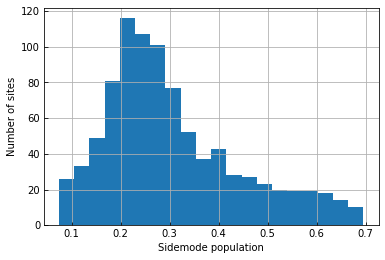

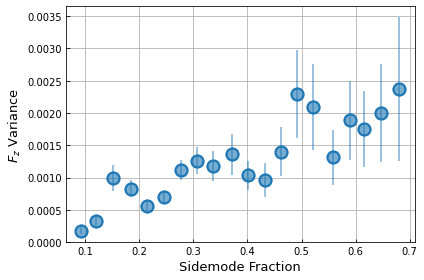

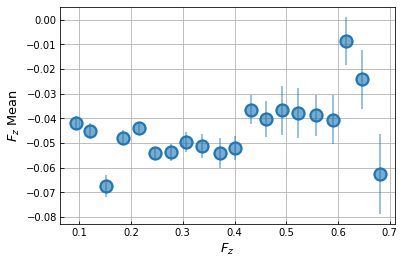

In [ ]:
# s is shots x position
s = (p + m)/t

### Look at everything together
s = s.ravel()
pol = ((p - m)/t).ravel()

fig, ax = plt.subplots()

### hist returns value, bins, artist list
_, bins, _ = ax.hist(s, bins = 20)
ax.set_ylabel("Number of sites")
ax.set_xlabel("Sidemode population")

bin_indices = np.digitize(s, bins)

s_sorted = np.array([s[bin_indices == i] for i in np.arange(len(bins))])
pol_sorted = np.array([pol[bin_indices == i] for i in np.arange(len(bins))])
means = np.fromiter(map(np.mean, s_sorted), dtype = float)
vars = np.fromiter(map(np.var, pol_sorted), dtype = float)
fz_mean = np.fromiter(map(np.mean, pol_sorted), dtype = float)
var_error = vars * np.sqrt(2/np.fromiter(map(len, pol_sorted), dtype = int))
fz_mean_error = np.sqrt(vars) * np.sqrt(1/np.fromiter(map(len, pol_sorted), dtype = int))
fig, ax = plt.subplots(tight_layout = True)
transparent_edge_plot(ax, means, vars, var_error)
ax.set_ylim(0, None)
ax.set_xlabel("Sidemode Fraction", fontsize = labelsize)
ax.set_ylabel("$F_z$ Variance", fontsize = labelsize)

fig, ax = plt.subplots()
transparent_edge_plot(ax, means[1:], fz_mean[1:], fz_mean_error[1:])
#ax.set_ylim(0, None)
ax.set_xlabel("$F_z$", fontsize = labelsize)
ax.set_ylabel("Sidemode Fraction", fontsize = labelsize)


# Homodyne Measurements

* 2020-11-20-Cleaning
* 2020-11-19-SequentialRaman
* 2020-11-25-noMW
* 2020-11-25-MW
* 2020-12-01-gradient-MW
* 2020-12-01-gradient-noMW
* 2020-12-02-sidebands-MW  - same gradient as 12-01, but now with interactions at length = 3 sites
* 2020-12-02-sidebands-noMW
* 2020-12-02-sidebands-phaset0-noMW - same measurement as the previous one, but now calculating the phase reference from the beginning of the probe on, rather than the end.


In [14]:




def get_duration(folder):
    try:
        time = float(folder.split("Duration")[-1].split("us")[0])
    except Exception as e:
        time = float(folder.split("ProbeGradient")[-1].split("_")[0]) * 1e3
    return time

def make_plot(folder, fig, ax, normalize = True, key = get_duration, f2_threshold = 0):
    m, p, z = get_values(folder)
    t = m + p + z
    Fz = ((p/t)[:, :] - (m/t)[:, :])
    n_shots, n_traps = Fz.shape
    corr = np.corrcoef(Fz, rowvar = False) if normalize else np.cov(Fz, rowvar = False)
    mx = np.max(np.abs(corr))

    cax = ax.imshow(corr, cmap = correlation_colormap, vmin = -mx, vmax = mx)
    fig.colorbar(cax, ax = ax)
    ax.grid(False)
    title = key(folder)
    ax.set_title(f"{title}")
    ax.grid(False)    
    return corr

def summary_plot(folder, key = get_duration, normalize = False, f2_threshold = 0):

    folders = sorted(glob.glob(f"{drive_location}HomodyneMeasurements/{folder}/*/"), 
                 key = key)
    if f2_threshold is not 0:
        assert len(folders) == len(f2_threshold), "F = 2 Threshold must have same length as the number of folders"
    data_location = folders[0].split("/")[-3]
    fig, ax = plt.subplots(1, len(folders), figsize = (3 * len(folders), 2.4))
    if len(folders) > 1:
        mean_cov = np.array([make_plot(folders[i], fig, ax[i], normalize = normalize, key = key, 
                                       f2_threshold = f2_threshold[i]) for i in range(len(folders))])
    else:
        make_plot(folders[0], fig, ax, normalize = False)
    fig.tight_layout(rect = (0, 0, 1, 0.93))
    fig.suptitle(f"{data_location}")
    fig.savefig(f"{drive_location}HomodyneMeasurements/{folder}/all_summary_{folder}.png", dpi = 200)
    return mean_cov

def get_diag_value(corr, k = 0):
    return np.mean(np.diag(corr, k = k))

## Fit covariance fringe

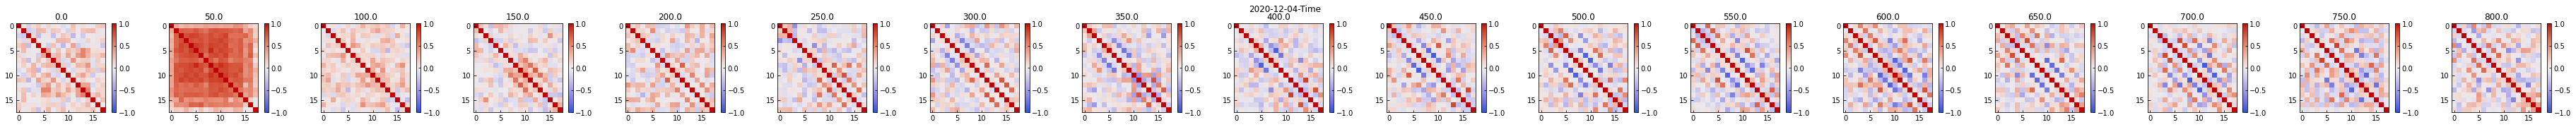

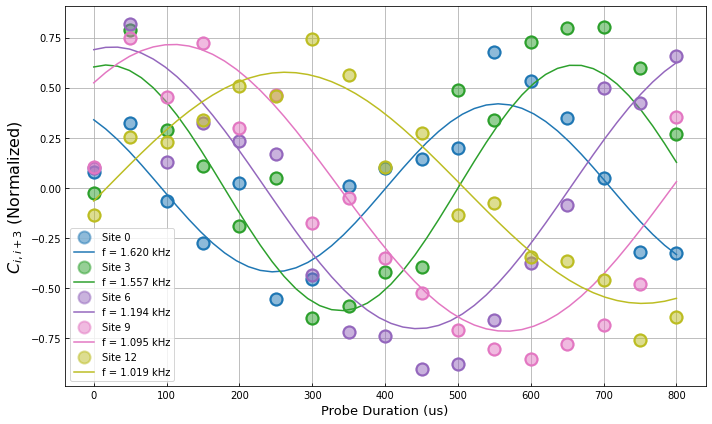

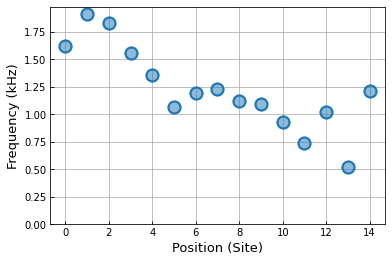

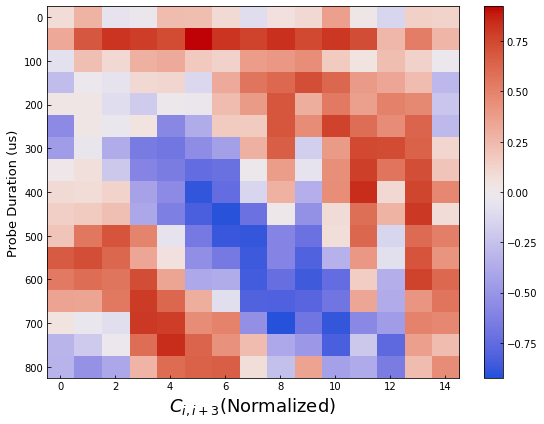

In [102]:
from scipy import optimize
def get_duration(folder):
    time = float(folder.split("IntDuration")[-1].split("us")[0])
    return time



label = "Probe Duration (us)"

folder = "2020-12-04-Time"
data_loc = f"{drive_location}HomodyneMeasurements/{folder}/"
folders_mw = sorted(glob.glob(f"{data_loc}*/"), 
                 key = get_duration)
durations = np.fromiter(map(get_duration, folders_mw), dtype = float)
normalize = True
normalized_label = "(Normalized)" if normalize else "(Unnormalized)"

cov_mw = summary_plot(folder, normalize = normalize, key = get_duration, f2_threshold=np.linspace(0, 0, len(durations)))

k = 3
mean_cov_mw = np.array([np.diag(i, k = k) for i in cov_mw])

def fit_sin(t, amp, freq, phase):
    return amp * np.sin(2 * np.pi * t * freq + phase)

def fit_single_fringe(durations, cov, i, k = 3):
    site = np.array([np.diag(corr, k = k) for corr in cov])[:, i]
    guess = [0.75, 0.0015, 0]
    popt, _ = optimize.curve_fit(fit_sin, durations, site, p0 = guess)
    return popt

fig, ax = plt.subplots(figsize = (10,6))
for i in np.arange(0, mean_cov_mw.shape[1], 3):    
    _, base = transparent_edge_plot(ax, durations, mean_cov_mw[:, i], label = f"Site {i}")
    ax.set_xlabel(label, fontsize = labelsize)
    ax.set_ylabel(r"$C_{i, i + " + f"{k}" + "}$ " + normalized_label, fontsize = labelsize +3)
    guess = [0.75, 0.001, 0]
    fine_durations = np.linspace(np.min(durations), np.max(durations))
    popt, _ = optimize.curve_fit(fit_sin, durations, mean_cov_mw[:, i], p0 = guess)
    ax.plot(fine_durations, fit_sin(fine_durations, *popt), label = f"f = {popt[1] * 1e3:.3f} kHz", 
            c = base.get_color())
ax.legend()
fig.tight_layout()
fig.savefig(data_loc +f"summary_{folder}.png", dpi = 200)
#print(popt)


relevant_positions = np.arange(cov_mw.shape[1] - k)
freqs = 1e3 * np.array([fit_single_fringe(durations, cov_mw, i, k = 3)[1] 
        for i in relevant_positions])
fig, ax = plt.subplots()
transparent_edge_plot(ax, relevant_positions, np.abs(freqs))
ax.set_ylabel("Frequency (kHz)", fontsize = labelsize)
ax.set_xlabel("Position (Site)", fontsize = labelsize)
ax.set_ylim(0, None)

fig, ax = plt.subplots(figsize = (8, 6))
off_diag = [np.diag(corr, k = k) for corr in cov_mw]
mag = np.max(np.abs(off_diag))
d_dur = np.diff(durations)[0]
extent = [-0.5, 14.5, np.max(durations) + d_dur/2, np.min(durations) - d_dur/2]
cax = ax.imshow(off_diag, vmin = -mag, vmax = mag, cmap = correlation_colormap,
          extent = extent, aspect = "auto")
fig.colorbar(cax, ax = ax)
ax.grid(False)
ax.set_xlabel(r"$C_{i, i + 3}$" + normalized_label, fontsize = labelsize + 5)
ax.set_ylabel(label, fontsize = labelsize)
fig.tight_layout()
fig.savefig(data_loc +f"corr3_summary_{folder}.png", dpi = 200)

We can also look at correlation spreading

(5, 17, 12)


Text(0.5, 0, '$|C_{i, i + x}|$(Normalized)')

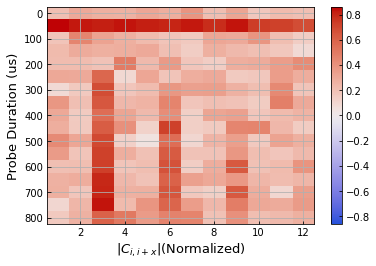

In [103]:
durations = durations[:18]
def create_extent(x_arr, y_arr):
    x_diff = np.diff(x_arr)[0]
    y_diff = y_arr[1] - y_arr[0]
    extent = [np.min(x_arr) - x_diff/2, np.max(x_arr) + x_diff/2, 
              np.max(y_arr) + y_diff/2, np.min(y_arr) - y_diff/2]
    return extent

i = 4
ks = np.arange(1, 13)
mat = np.array([[[cov_mw[d, i, i + k]  for k in ks]
                 for d in range(len(durations))] for i in [0, 1, 2, 3, 4]])
print(mat.shape)
mat = np.max(np.abs(mat), axis = 0)
mag = np.max(np.abs(mat))
fig, ax = plt.subplots()
extent = create_extent(ks, durations)

cax = ax.imshow(mat, vmin = -mag, vmax = mag, cmap = correlation_colormap, 
                extent = extent, aspect = "auto")
fig.colorbar(cax, ax= ax, label = "")
ax.set_ylabel("Probe Duration (us)", fontsize = labelsize)
ax.set_xlabel("$|C_{i, i + x}|$" + normalized_label, fontsize = labelsize)


## Look at covariance(phase offset)

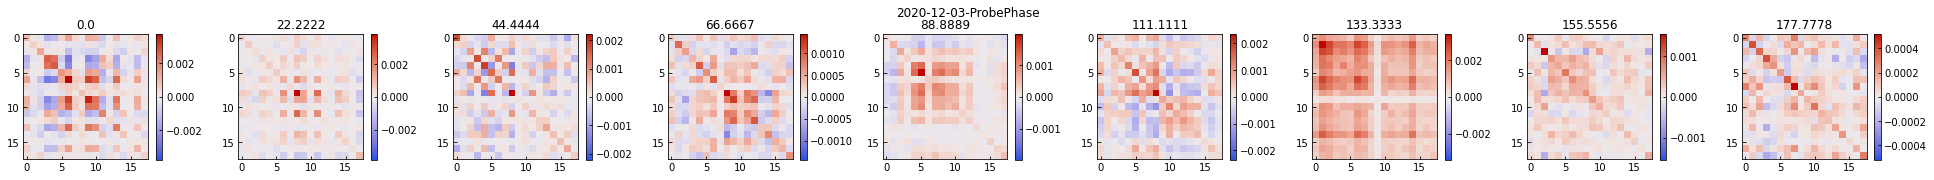

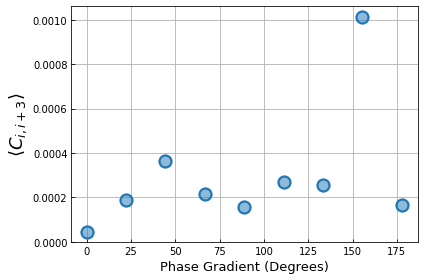

In [ ]:
from scipy import optimize
folder = "2020-12-04-RamanPulseTime"
def get_gradient(folder):
    time = float(folder.split("SmallRamanPiHalf")[-1].split("us")[0])
    return time

data_loc = f"{drive_location}HomodyneMeasurements/{folder}/"

durations = np.fromiter(map(get_gradient, glob.glob(f"{data_loc}/*/")), dtype = float)
cov_mw = summary_plot(folder, get_gradient, normalize=False)
k = 3
mean_cov_mw = [get_diag_value(i, k) for i in cov_mw]

def fit_sin(t, amp, freq, phase):
    return amp * np.sin(2 * np.pi * t * freq + phase)

fig, ax = plt.subplots()
transparent_edge_plot(ax, durations, mean_cov_mw)
ax.set_xlabel("Phase Gradient (Degrees)", fontsize = labelsize)
ax.set_ylabel(r"$\langle C_{i, i + 3}\rangle$", fontsize = labelsize +5)
#guess = [0.001, 0.02, 0]
#popt, _ = optimize.curve_fit(fit_sin, durations, mean_cov_mw, p0 = guess)
#ax.plot(durations, fit_sin(durations, *popt))
fig.tight_layout()
fig.savefig(data_loc +f"summary_{folder}.png", dpi = 200)